### Assignment Description:

At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this, 
we want to develop a machine learning model that predicts customer churn. Your task as a Machine 
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job 
description.

In [2]:
# Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# Loading the Data and some basic checks

In [3]:
# to access to Excel support file
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [4]:
data1 = pd.read_excel(r"customer_churn_large_dataset.xlsx") # Reading the Data
data1.head()# it will give you first 5 rows

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
data1.columns


Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
data1.values

array([[1, 'Customer_1', 63, ..., 73.36, 236, 0],
       [2, 'Customer_2', 62, ..., 48.76, 172, 0],
       [3, 'Customer_3', 24, ..., 85.47, 460, 0],
       ...,
       [99998, 'Customer_99998', 64, ..., 96.11, 251, 1],
       [99999, 'Customer_99999', 51, ..., 49.25, 434, 1],
       [100000, 'Customer_100000', 27, ..., 76.57, 173, 1]], dtype=object)

In [8]:
####Check the Duplicate Columns

In [9]:
data1.columns.duplicated().sum()

0

In [10]:
data1.shape

(100000, 9)

In [11]:
data1.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# Data Preprocessing

## 1. Checking Missing values

In [12]:
data1.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

##### There is no Missing values in this Customer data

In [13]:
data1.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [14]:
data1.describe(include=['O'])#It will give you info about categorical data/columns

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


## 2.Conversion of categorical column into numerical column

In [15]:
pd.set_option('display.max_columns', None)
data1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [16]:
data1.Gender.value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [17]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data1.Name=lc.fit_transform(data1.Name)
data1.Gender=lc.fit_transform(data1.Gender)
data1.Location=lc.fit_transform(data1.Location)

In [18]:
data1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,2,17,73.36,236,0
1,2,11112,62,0,4,1,48.76,172,0
2,3,22223,24,0,2,5,85.47,460,0
3,4,33334,36,0,3,3,97.94,297,1
4,5,44445,46,0,3,19,58.14,266,0


## 3.Drop the unique and constant variable

In [19]:
data1.drop("CustomerID",axis=1,inplace = True)

In [20]:
data1.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0


## 4.Conversion object type to int/float type

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  int32  
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  int32  
 3   Location                    100000 non-null  int32  
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 5.0 MB


##### We can see that ,Above the Customer data has no Object type.

## 5.Analysing data

What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

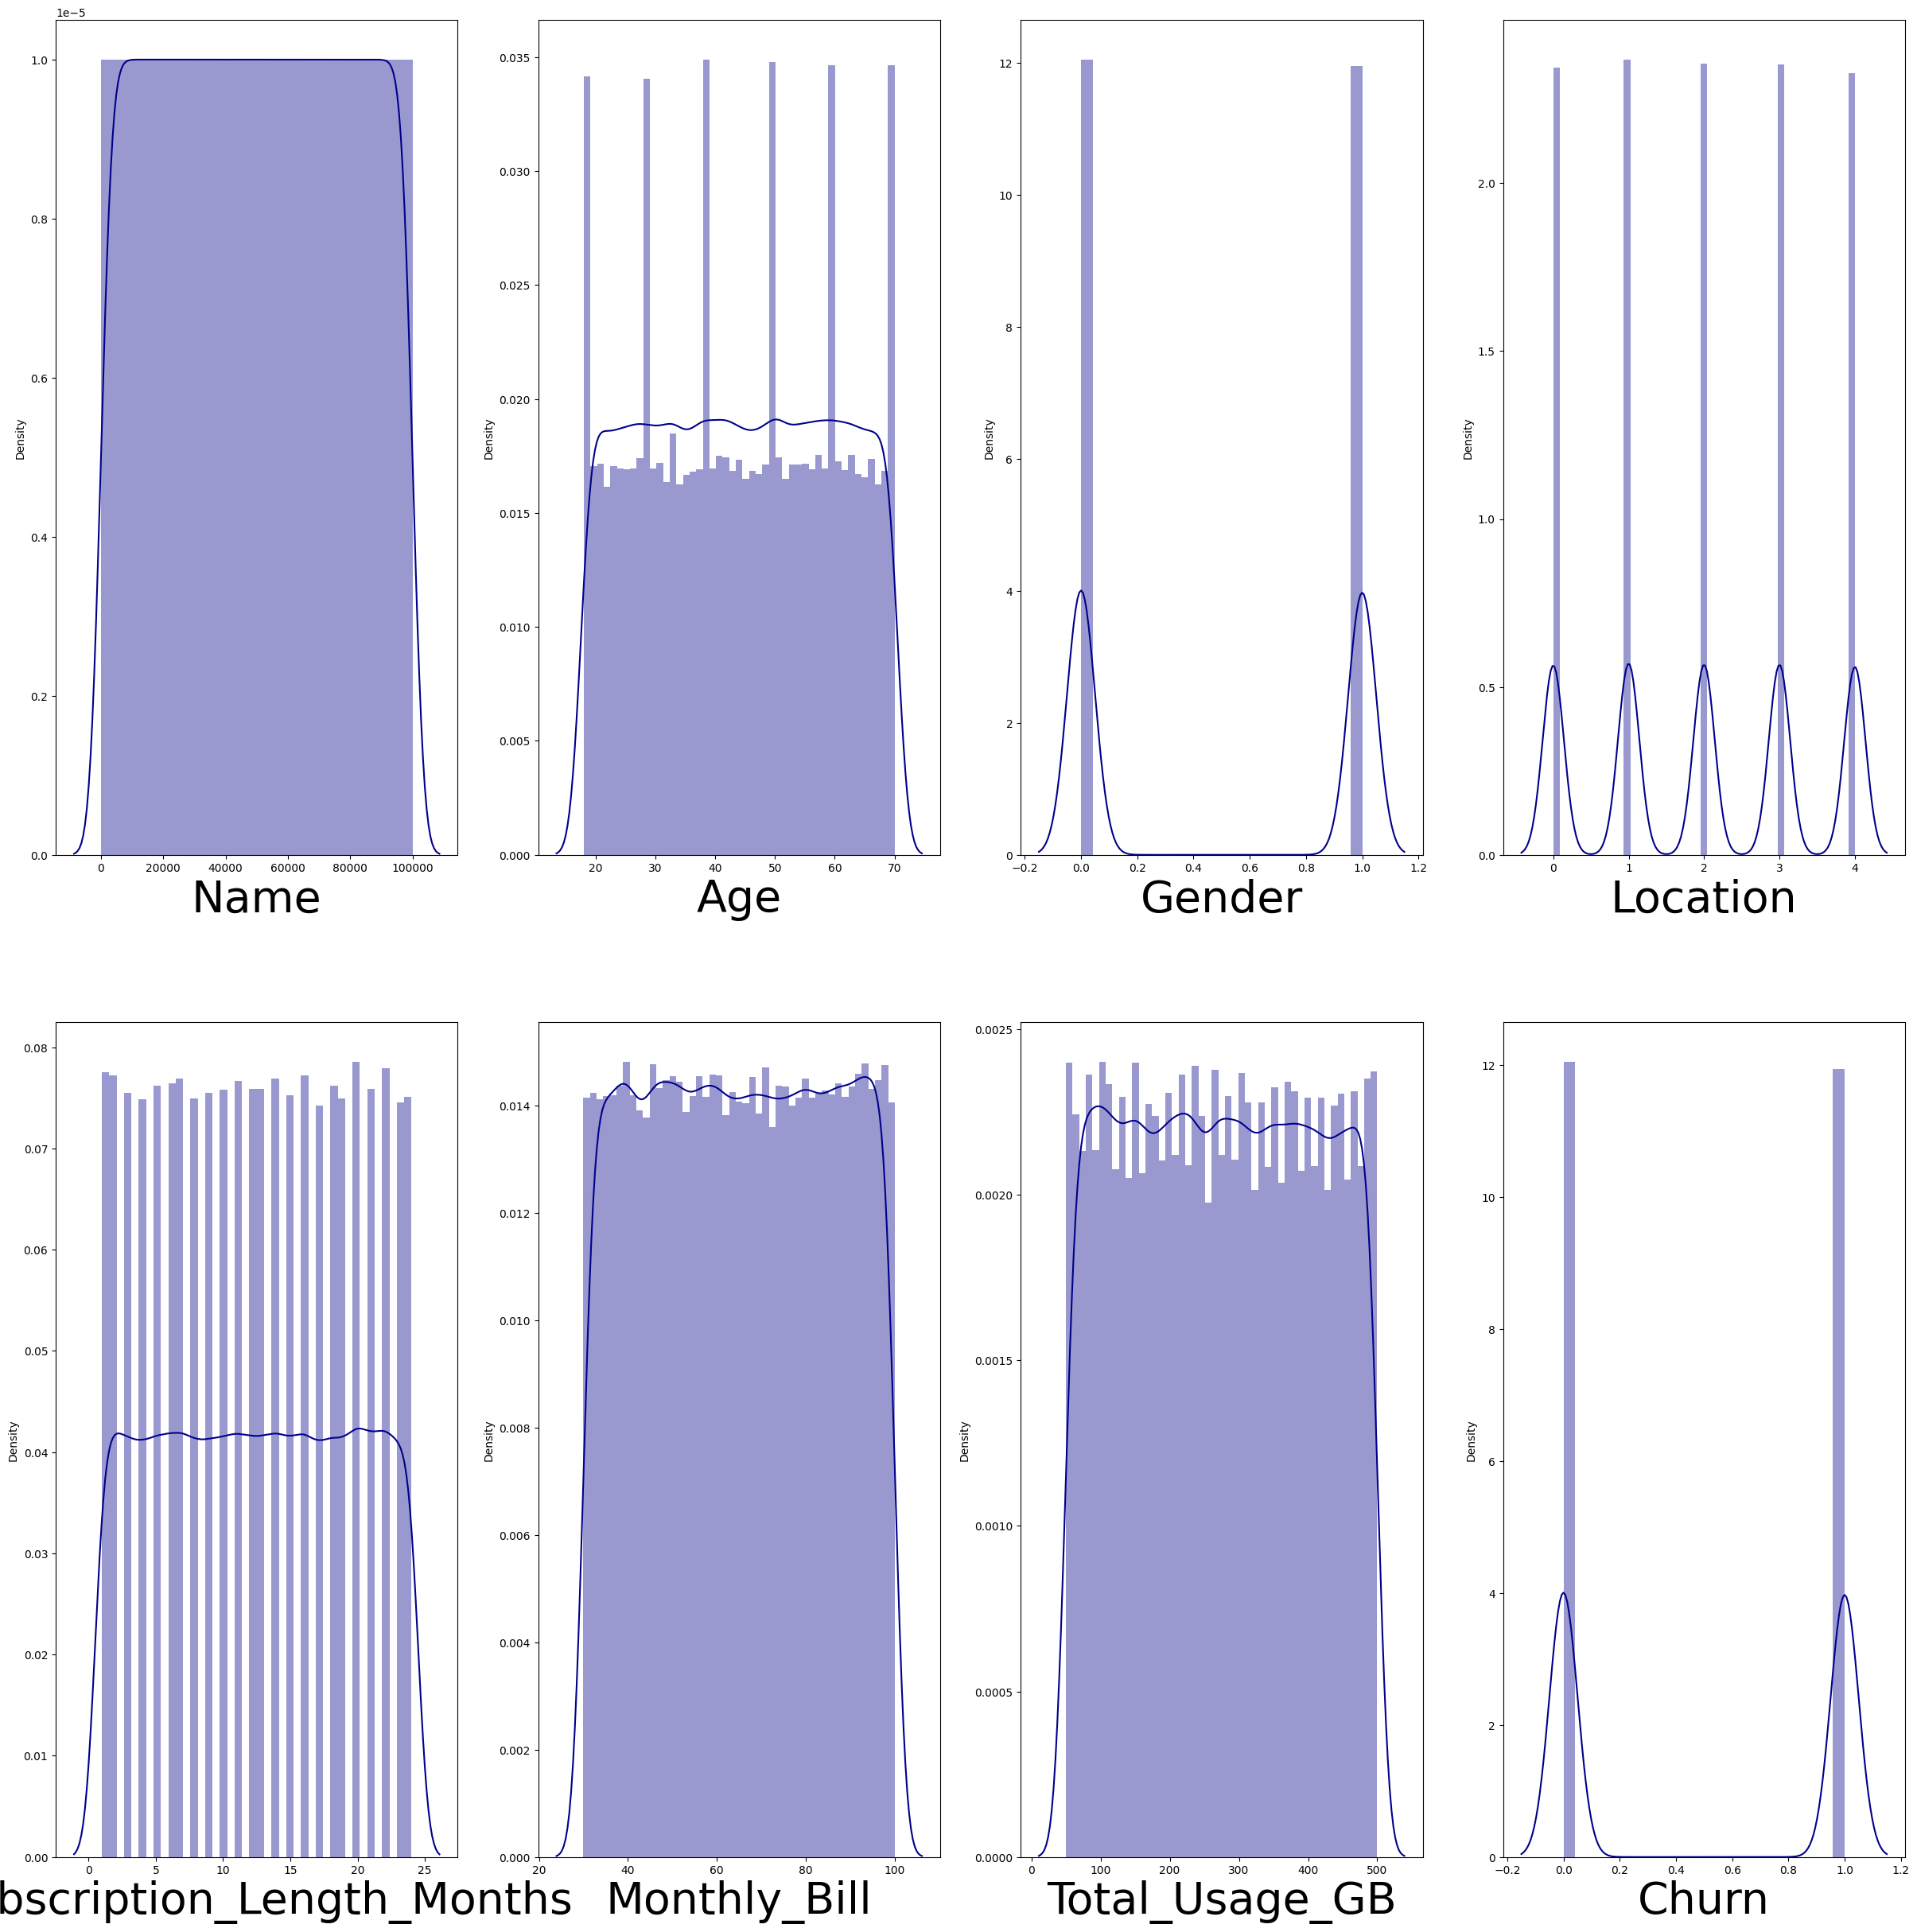

In [22]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in data1:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(x=data1[column],color='darkblue')
        plt.xlabel(column,fontsize=40)
        plotnumber +=1
plt.show()

## 6. Checking For Outlier

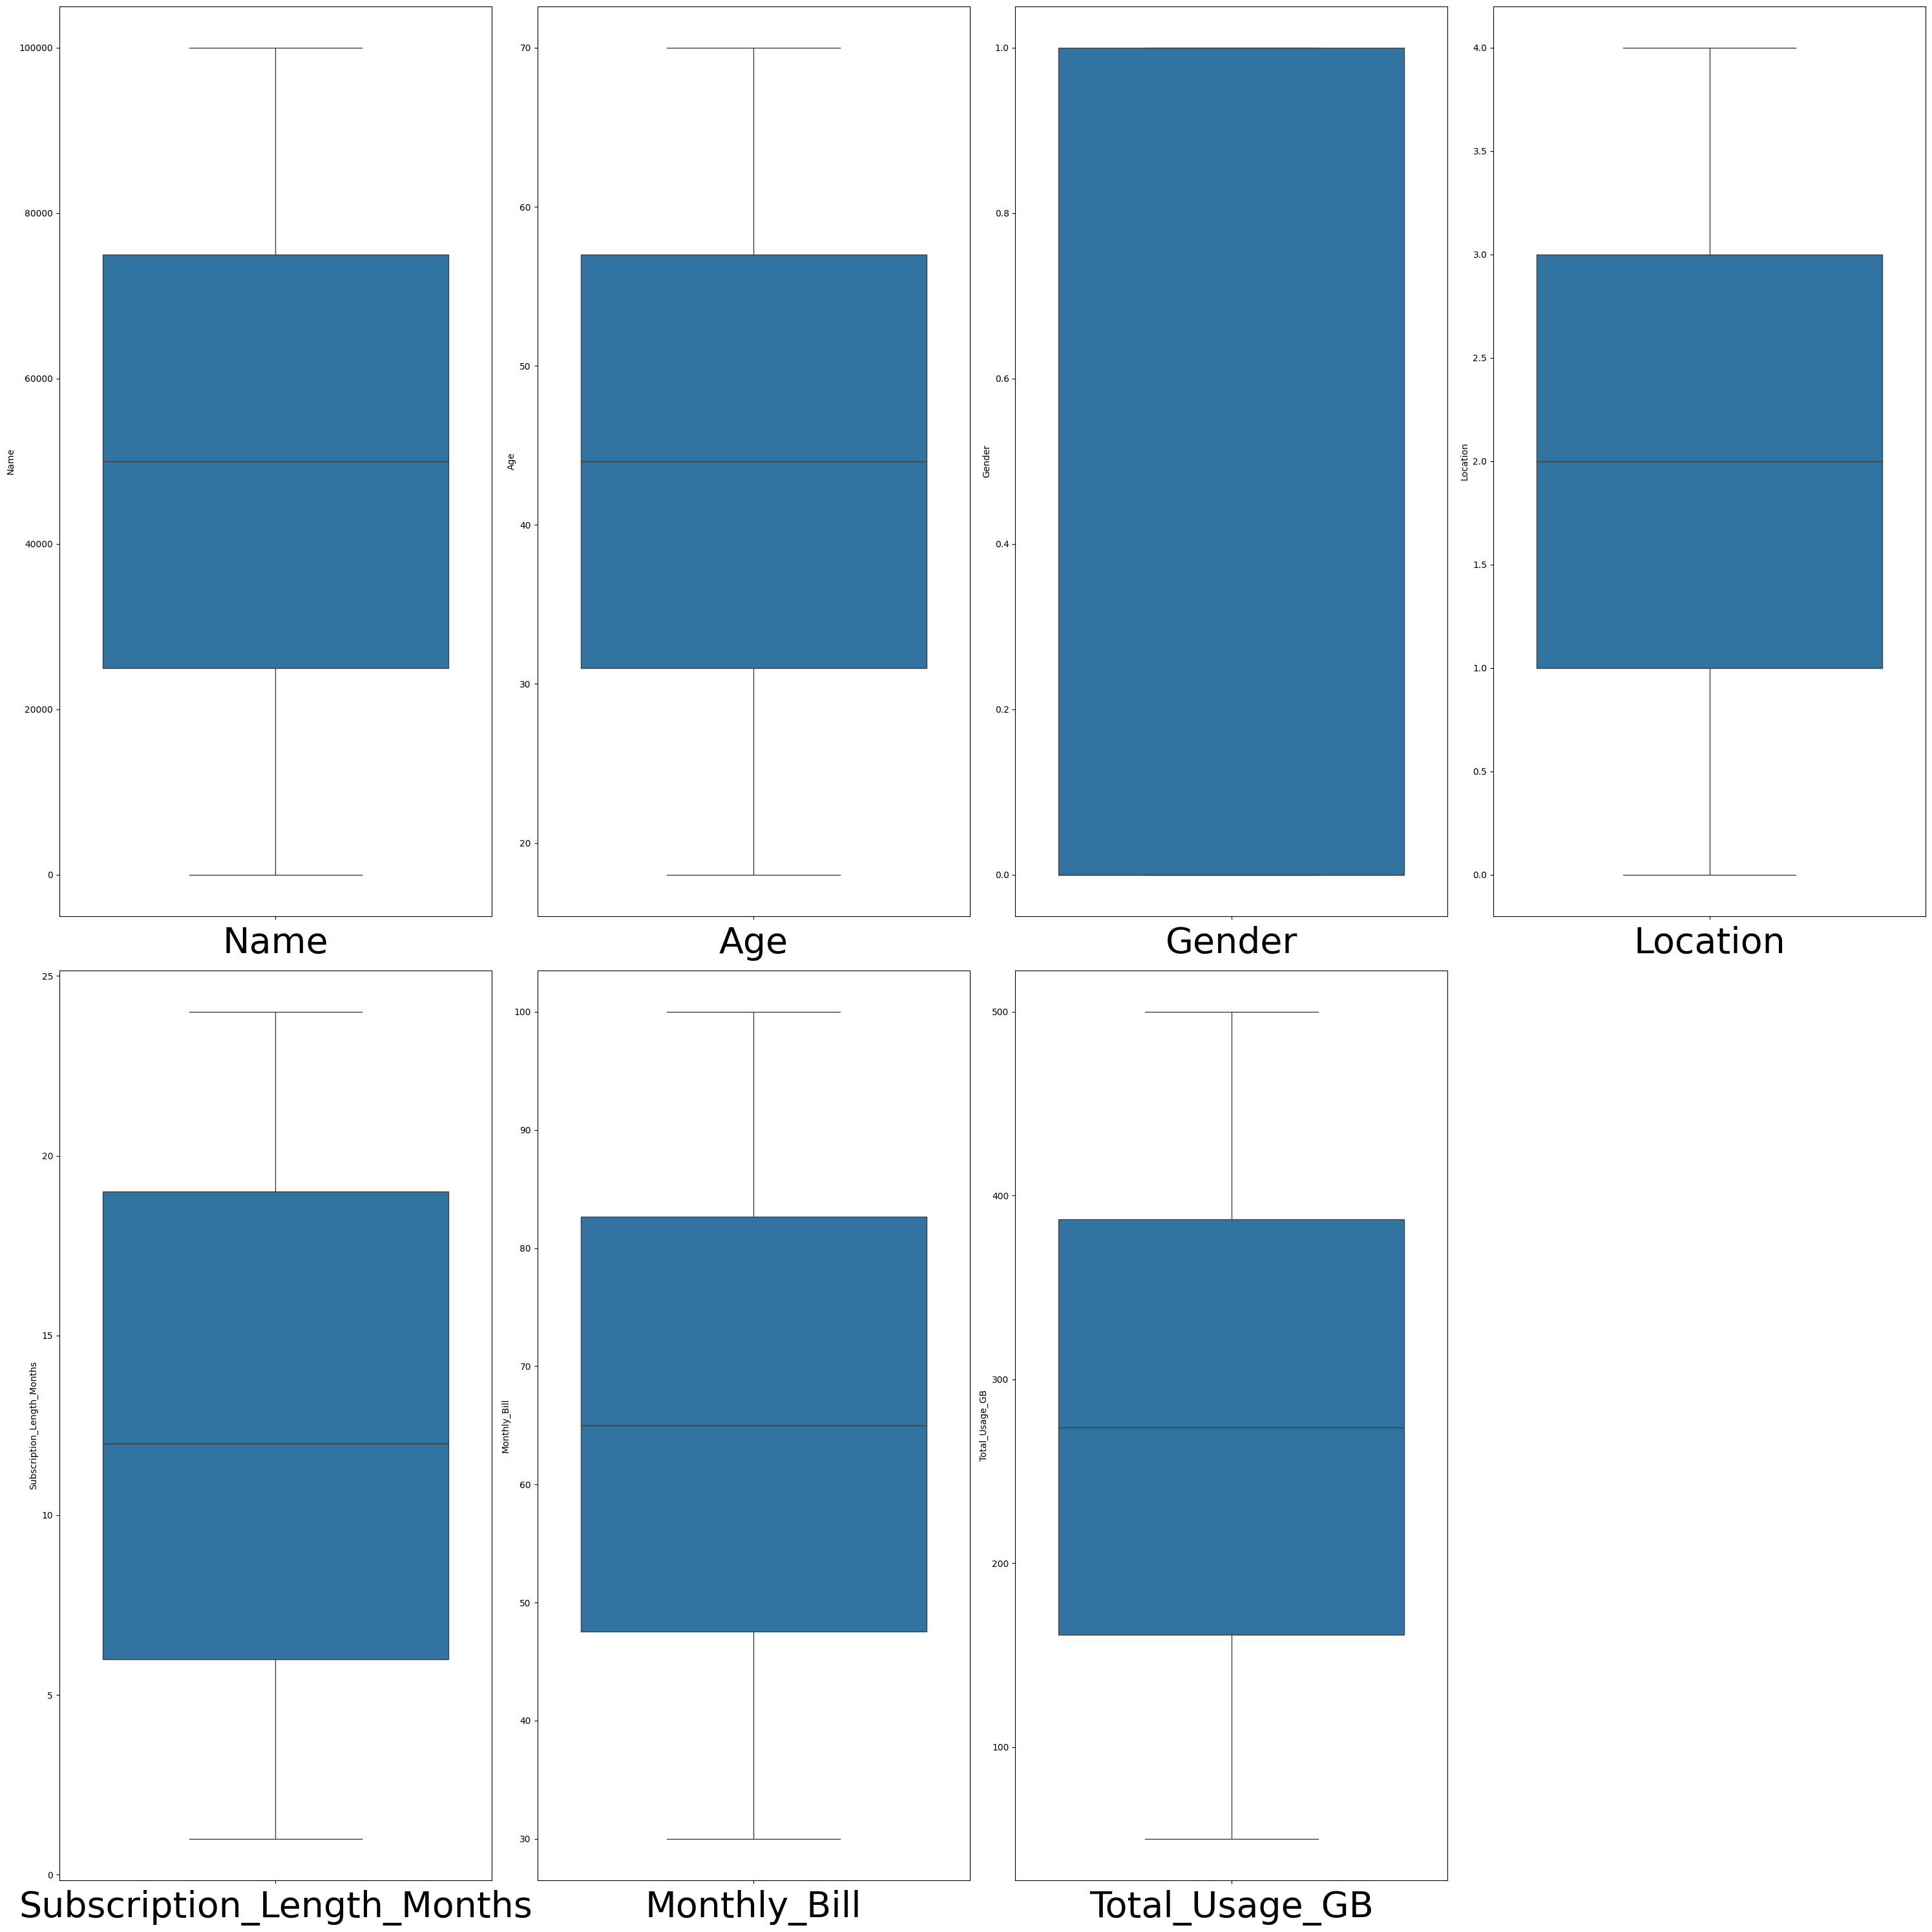

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for c in data1:
    if(plotnum<8):
        ax=plt.subplot(2,4,plotnum)
        sns.boxplot(data1[c])
        plt.xlabel(c,fontsize=40)
    plotnum+=1
plt.tight_layout()   

### From this above Boxplot it is clear that, there are no outliers in this customer data.

## 7. Checking the duplicate rows

In [24]:
data1.drop_duplicates()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,1,23,55.13,226,1
99996,99997,62,0,4,19,61.65,351,0
99997,99998,64,1,0,17,96.11,251,1
99998,99999,51,0,4,20,49.25,434,1


In [25]:
data1.duplicated().sum()  

0

In [26]:
data1.drop_duplicates(inplace = True)

In [27]:
data1.duplicated().sum()

0

## 8.Scaling the Contineous variable

In [28]:
data1.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0


### As a Data Scientist,We can see There are no such type of Contineous data.So we are not required to scale .

# Feature Selection

In [29]:
data1.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0


<Axes: >

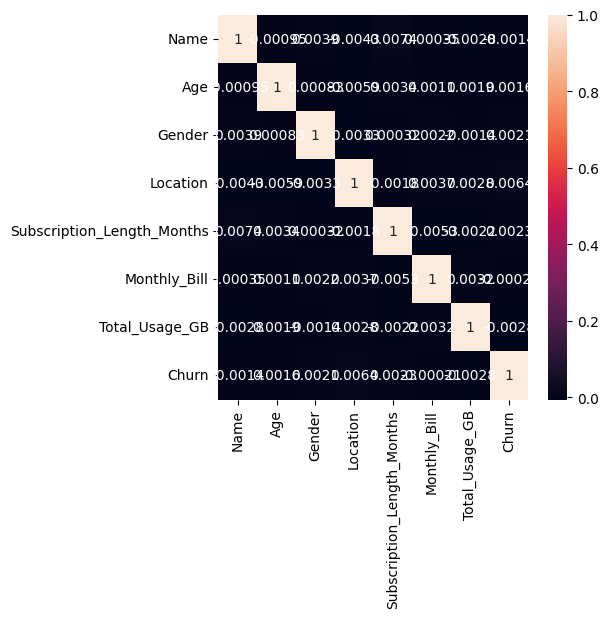

In [30]:
plt.figure(figsize=(5,5))#canvas size
sns.heatmap(data1.corr(),annot=True)

### There is no relationship among the Customer data .........

# Model Creation

In [31]:
data1.head(2)

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0


In [32]:
## defining X and y
X=data1[['Name','Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']]
y=data1.Churn

In [33]:
data1.Churn.value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

In [34]:
X

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0,63,1,2,17,73.36,236
1,11112,62,0,4,1,48.76,172
2,22223,24,0,2,5,85.47,460
3,33334,36,0,3,3,97.94,297
4,44445,46,0,3,19,58.14,266
...,...,...,...,...,...,...,...
99995,99996,33,1,1,23,55.13,226
99996,99997,62,0,4,19,61.65,351
99997,99998,64,1,0,17,96.11,251
99998,99999,51,0,4,20,49.25,434


In [35]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

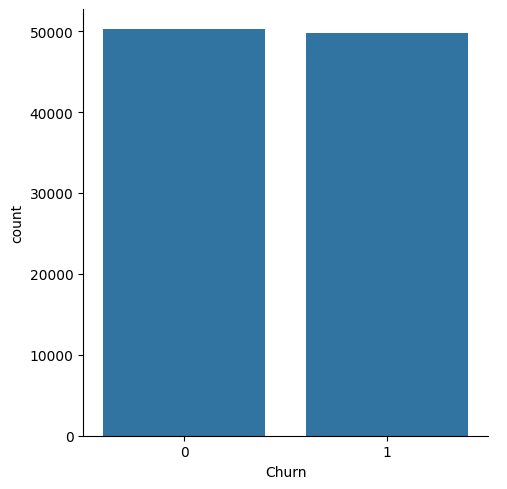

In [36]:
sns.catplot(x='Churn',data=data1,kind='count')

In [37]:
data1.Churn.value_counts()# that data inbalanced ,where we can see .....

Churn
0    50221
1    49779
Name: count, dtype: int64

# Balancing the data

In [38]:
# Install imblearn package - pip install imblearn
!pip install --user imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [39]:
X_smote, y_smote = smote.fit_resample(X,y)

In [40]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 50221, 1: 49779})
SMOTE Classes Counter({0: 50221, 1: 50221})


In [41]:
# Importing modules from sklearn library.................
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Evaluating the model..........................

from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(70309, 7)
(70309,)
(30133, 7)
(30133,)


 # Logistic Regression

Logistic Regression Training Score: 50.32
Logistic Regression Test Score: 49.9
Coefficient: [[-1.35157178e-07  5.28030487e-04 -4.50970892e-09  1.21247266e-04
   2.51697679e-04 -1.26541683e-04 -4.00210466e-05]]
Intercept: [4.47377162e-06]
Accuracy: 0.49902100686954504
Precision:  0.49824202518698457
recall:  0.5181836314074862
f1_score: 0.5080172076652327
AUC: 0.49905338474694483
Confusion Matrix:
 [[7243 7849]
 [7247 7794]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.50      0.48      0.49     15092
           1       0.50      0.52      0.51     15041

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



<Axes: >

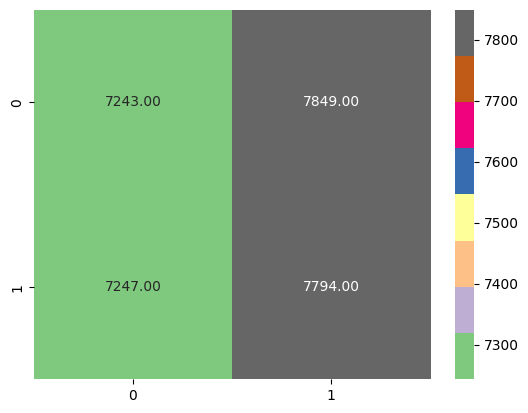

In [43]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score =round(logreg.score(X_train, y_train)*100,2)
logreg_score_test =round(logreg.score(X_test, y_test)*100,2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score:' , logreg_score)
print('Logistic Regression Test Score:', logreg_score_test)
print('Coefficient:', logreg.coef_)
print('Intercept:', logreg.intercept_)
print('Accuracy:', accuracy_score(y_test,log_predicted))
print('Precision: ', precision_score(y_test,log_predicted))
print('recall: ', recall_score(y_test,log_predicted))
print('f1_score:', f1_score(y_test,log_predicted))
print('AUC:', roc_auc_score(y_test, log_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n ', classification_report(y_test,log_predicted))



sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt=".2f",cmap = 'Accent')




# Random Forest

Random Forest Score: 
 100.0
Random Forest Test Score: 
 49.96
Accuracy: 
 0.49955198619453756
[[7839 7253]
 [7827 7214]]
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     15092
           1       0.50      0.48      0.49     15041

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



<Axes: >

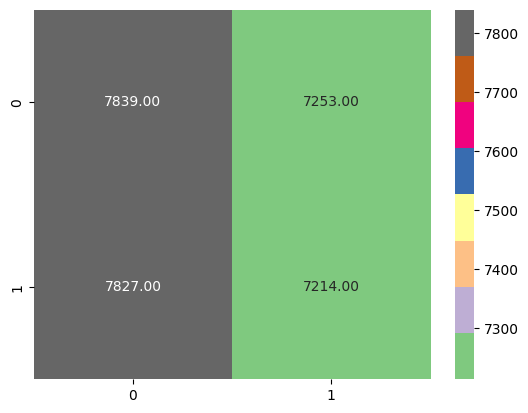

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train)* 100,2)
random_forest_score_test =round(random_forest.score(X_test, y_test)*100,2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))



sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt=".2f",cmap = 'Accent')


# KNN

Score of the model is -  65.83
Report card of this model - 
              precision    recall  f1-score   support

           0      0.498     0.496     0.497     15092
           1      0.497     0.499     0.498     15041

    accuracy                          0.498     30133
   macro avg      0.498     0.498     0.498     30133
weighted avg      0.498     0.498     0.498     30133

Accuracy score -  0.49756081372581556
AUC: 
 0.49756285685986007


<Axes: >

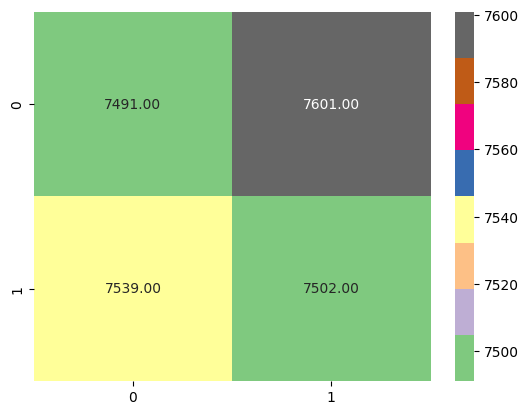

In [45]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predicted_knn = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)


score = knn.score(X_test, y_test)
print("Score of the model is - ",knn_score)
print("Report card of this model - ")
print(classification_report(y_test, y_predicted_knn, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_predicted_knn))
print('AUC: \n', roc_auc_score(y_test, y_predicted_knn))





sns.heatmap(confusion_matrix(y_test,y_predicted_knn),annot=True,fmt=".2f",cmap = 'Accent')




In [46]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic_Regression','Random_Forest','KNN'],
    'Score': [ logreg_score,random_forest_score,knn_score],
    'Accuracy_Score': [logreg_score_test,random_forest_score_test,knn_score_test]})

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Score,Accuracy_Score
1,Random_Forest,100.00,49.96
0,Logistic_Regression,50.32,49.90
2,KNN,65.83,49.76


We can see that,we got low accuracy score,so that performance wise very low.let's try to improve our model performance.....

## Model Optimization:

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=5), param_grid, verbose = 3,scoring='f1',cv=3)

#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.667 total time= 4.3min


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
clf=SVC(C=1, gamma=0.01,random_state=5) ##0.1

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_clf=clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_clf))

In [ ]:
f1=f1_score(y_test,y_clf)
f1

In [ ]:
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

### Hyperparameter tuning

### Hyperparameter tuning is searching the hyperparameter space for a set of values that will optimize your model architecture.

In [ ]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],  #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



In [ ]:
tree_cv.best_params_#getting best parameters from cv

In [ ]:
tree_cv.best_score_#getting best score from cv

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf= 4,min_samples_split=2,splitter='random')#passing best parameter to decision tree

In [ ]:
dt1.fit(X_train,y_train)#traing model with best parameter

In [ ]:
y_p_tr = dt1.predict(X_train)

In [ ]:
train_f1 = f1_score(y_train,y_p_tr)

In [ ]:
train_f1

In [ ]:
Y_hat1 = dt1.predict(X_test)#predicting
#y_hat1

In [ ]:
acc_test=accuracy_score(y_test,Y_hat1)#checking accuracy
acc_test

In [ ]:
test_f1=f1_score(y_test,Y_hat1)#f1_score
test_f1

In [ ]:
print(classification_report(y_test,Y_hat1))#it will give precision,recall,f1 scores and accuracy 